# Measuring X as a function of time

Sometimes we'd like to measure something as a function of elapsed wall clock time. This notebook provides a simple example of doing that using the `ElapsedTimeParameter`.

In [1]:
import os

import numpy as np

from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes.instrument.parameter import Parameter
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.sqlite.database import initialise_or_create_database_at
from qcodes.dataset.experiment_container import new_experiment
from qcodes.dataset.plotting import plot_dataset

### Prepatory footwork: setup database and experiment

In [2]:
initialise_or_create_database_at(os.path.join(os.getcwd(), 'x_as_a_function_of_time.db'))
new_experiment('tutorial', 'no_sample')

tutorial#no_sample#6@C:\Users\wihpniel\src\qcodes\docs\examples\DataSet\x_as_a_function_of_time.db
--------------------------------------------------------------------------------------------------

## The measurement itself

We'll measure some Brownian motion. We set up a parameter for the noise.

In [3]:
noise = Parameter('noise', 
                  label='Position',
                  unit='m',
                  get_cmd=lambda: np.random.randn())
time = ElapsedTimeParameter('time')

In [4]:
meas = Measurement()
meas.register_parameter(time)
meas.register_parameter(noise, setpoints=[time])

In [5]:
with meas.run() as datasaver:
    pos = 0
    time.reset_clock()
    for _ in range(100):
        pos += noise()
        now = time()
        datasaver.add_result((noise, pos), (time, now))
        
dataset = datasaver.dataset

Starting experimental run with id: 5


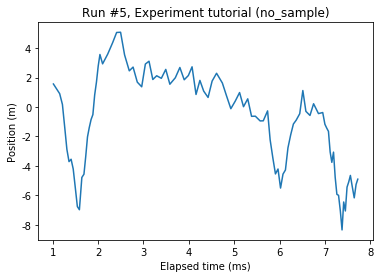

In [6]:
axs, cbs = plot_dataset(dataset)